In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

import re

# Sample sentences
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

# ---------------------------
# Clean Data
# ---------------------------

# Remove special characters
sentences = re.sub(r'[^A-Za-z0-9]+', ' ', sentences)

# Remove 1-letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# Convert to lowercase
sentences = sentences.lower()

# ---------------------------
# Vocabulary
# ---------------------------

words = sentences.split()
vocab = set(words)

vocab_size = len(vocab)
embed_dim = 10
context_size = 2

# ---------------------------
# Implementation
# ---------------------------

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

# ---------------------------
# Data bags
# ---------------------------

# data = [(context, target)]
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))

# Show first 5 examples
print(data[:5])


[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [2]:

# ---------------------------
# Embeddings
# ---------------------------
embeddings = np.random.random_sample((vocab_size, embed_dim))

# ---------------------------
# Linear Model
# ---------------------------
def linear(m, theta):
    w = theta
    return m.dot(w)

# ---------------------------
# Log softmax and NLLLoss = Cross Entropy
# ---------------------------

def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum() / len(out)

def log_softmax_crossentropy_with_logits(logits, target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)), target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)

    return (-out * np.log(softmax)).sum() / logits.shape[0]

# ---------------------------
# Forward function
# ---------------------------

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

# ---------------------------
# Backward function
# ---------------------------

def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

# ---------------------------
# Optimize function
# ---------------------------

def optimize(theta, dw, lr=0.01):
    theta = theta - lr * dw
    return theta


In [3]:
# ---------------------------
# Optimize function
# ---------------------------

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

# ---------------------------
# Training
# ---------------------------

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

epoch_losses = {}

for epoch in range(80):
    losses = []

    for context, target in data:
        # Convert context words to indices
        context_idxs = np.array([word_to_ix[w] for w in context])

        # Forward pass
        preds = forward(context_idxs, theta)

        # Convert target word to index
        target_idxs = np.array([word_to_ix[target]])

        # Compute loss
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)

        # Backpropagation
        grad = backward(preds, theta, target_idxs)

        # Update parameters
        theta = optimize(theta, grad, lr=0.03)

    # Store losses for this epoch
    epoch_losses[epoch] = losses

print("Training completed.")



C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_30944\1283688197.py:29: RuntimeWarning: invalid value encountered in divide
  softmax = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)


Training completed.


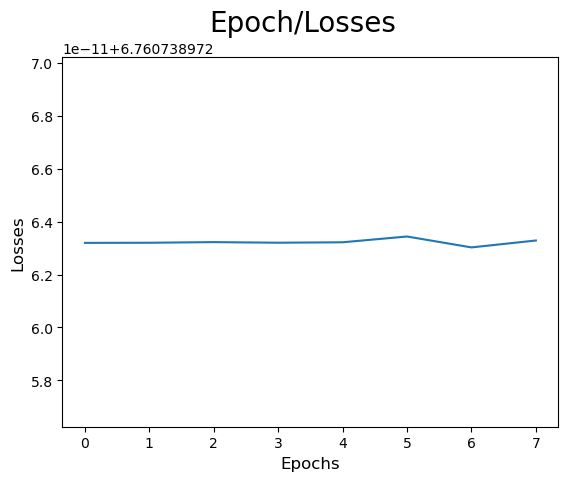

by


In [4]:
# ---------------------------
# Analyze
# ---------------------------

# Plot loss per epoch
ix = np.arange(0, 80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix, [epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)
plt.show()

# ---------------------------
# Predict function
# ---------------------------

def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word

# Example prediction
# Context: ['we', 'are', 'to', 'study']
print(predict(['we', 'are', 'to', 'study']))


In [5]:
# ---------------------------
# Accuracy Function
# ---------------------------

def accuracy():
    wrong = 0

    for context, target in data:
        # Use predict() to get the predicted word
        pred_word = predict(context)
        if pred_word != target:
            wrong += 1

    acc = 1 - (wrong / len(data))
    return acc

# Compute accuracy
print("Accuracy:", accuracy())

# ---------------------------
# Example Prediction
# ---------------------------

# Ensure function name matches (use 'predict', not 'prdect')
print(predict(['processes', 'manipulate', 'things', 'study']))



Accuracy: 0.01851851851851849
by
